# Support Vector Regression (SVR)

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [20]:
dataset = pd.read_csv('preprocessing/metrics.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [21]:
y = y.reshape(len(y),1)

## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [24]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the Test set results

In [25]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.98681 1.03672]
 [1.03577 0.98518]
 [0.41062 0.3536 ]
 [0.25599 0.22855]
 [0.14324 0.08944]
 [1.02983 1.01857]
 [0.57629 0.5765 ]
 [0.95131 0.93344]
 [0.99842 0.95758]
 [1.04052 1.03873]
 [0.93374 0.94196]
 [0.9709  0.95617]
 [1.05784 1.01578]
 [0.97222 0.97649]]


## Predict a new value

In [26]:
y1_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[14.96,41.76,1024.07,73.17]])).reshape(-1,1))
print(y1_pred)

[[0.61874]]


## Evaluating the Model Performance

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9887931246795538

In [28]:
## Visualising the SVR results (for higher resolution and smoother curve)

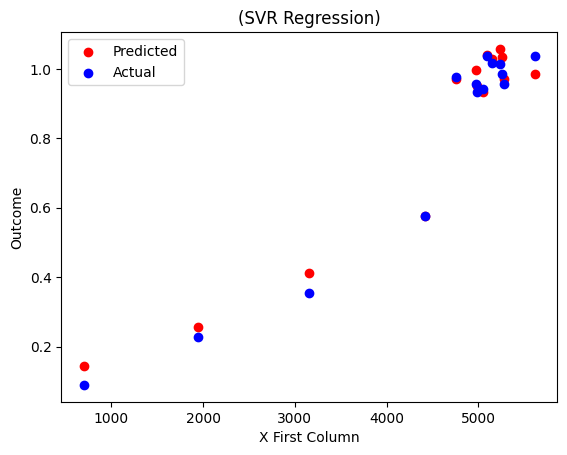

In [29]:
X_a = X_test[:, 0:1]
plt.scatter(X_a, y_pred, color='red', label='Predicted')
# Assuming you have actual values (y_test)
plt.scatter(X_a, y_test, color='blue', label='Actual')  # Use y_test if available
plt.title('(SVR Regression)')
plt.xlabel('X First Column')
plt.ylabel('Outcome')
plt.legend()  # Add legend for clarity
plt.show()